#### The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset:cars-dataset-1.csv

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

To perform:

    EDA & Pre-processing 
    visualize how the different variables are related 
    Useing K Means or Hierarchical clustering to find out the optimal no of clusters in the data
    linear regression model on different clusters separately and find the coefficients of the models individually 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cars = pd.read_csv("cars-dataset.csv")

In [3]:
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
cars.shape

(398, 8)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
cars.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [7]:
objectc_col = pd.DataFrame(cars.hp.str.isdigit())
cars[objectc_col['hp'] == False]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [8]:
cars1 = cars.replace("?",np.nan)

In [9]:
cars1["hp"] = cars1['hp'].astype("float64")

In [10]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


##### So, now we have numeric values in the  numeric column 'hp' .Just we have now 6 NaN values to be treated. 

In [11]:
cars1 = cars1.fillna(cars1['hp'].median())

In [12]:
cars.median()

cyl        4.0
disp     148.5
wt      2803.5
acc       15.5
yr        76.0
mpg       23.0
dtype: float64

In [13]:
cars1.loc[cars1['hp'] == 93.5]         

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,93.5,2046,19.0,71,25.0
126,ford maverick,6,200.0,93.5,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,93.5,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,93.5,2905,14.3,80,23.6
354,renault 18i,4,100.0,93.5,2320,15.8,81,34.5
374,amc concord dl,4,151.0,93.5,3035,20.5,82,23.0


##### We take median to fill the 6 missing values and the data preprocessing completed.Data is ready

In [14]:
cars1.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
wt,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


We can check the individual skewness.Skewness with positive values indicates data is skewed towards right.
Positive Kurtosis values indicates  more data points around the tail for the dataset columns.

In [15]:
cars1.kurtosis(numeric_only  = True)

cyl    -1.376662
disp   -0.746597
hp      0.763583
wt     -0.785529
acc     0.419497
yr     -1.181232
mpg    -0.510781
dtype: float64

In [16]:
cars1.skew(numeric_only  = True)

cyl     0.526922
disp    0.719645
hp      1.106224
wt      0.531063
acc     0.278777
yr      0.011535
mpg     0.457066
dtype: float64

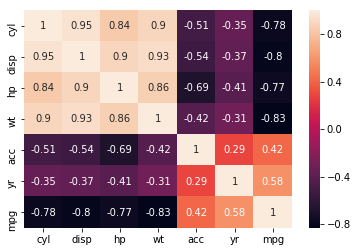

In [17]:
sns.heatmap(cars1.corr(),annot= True)

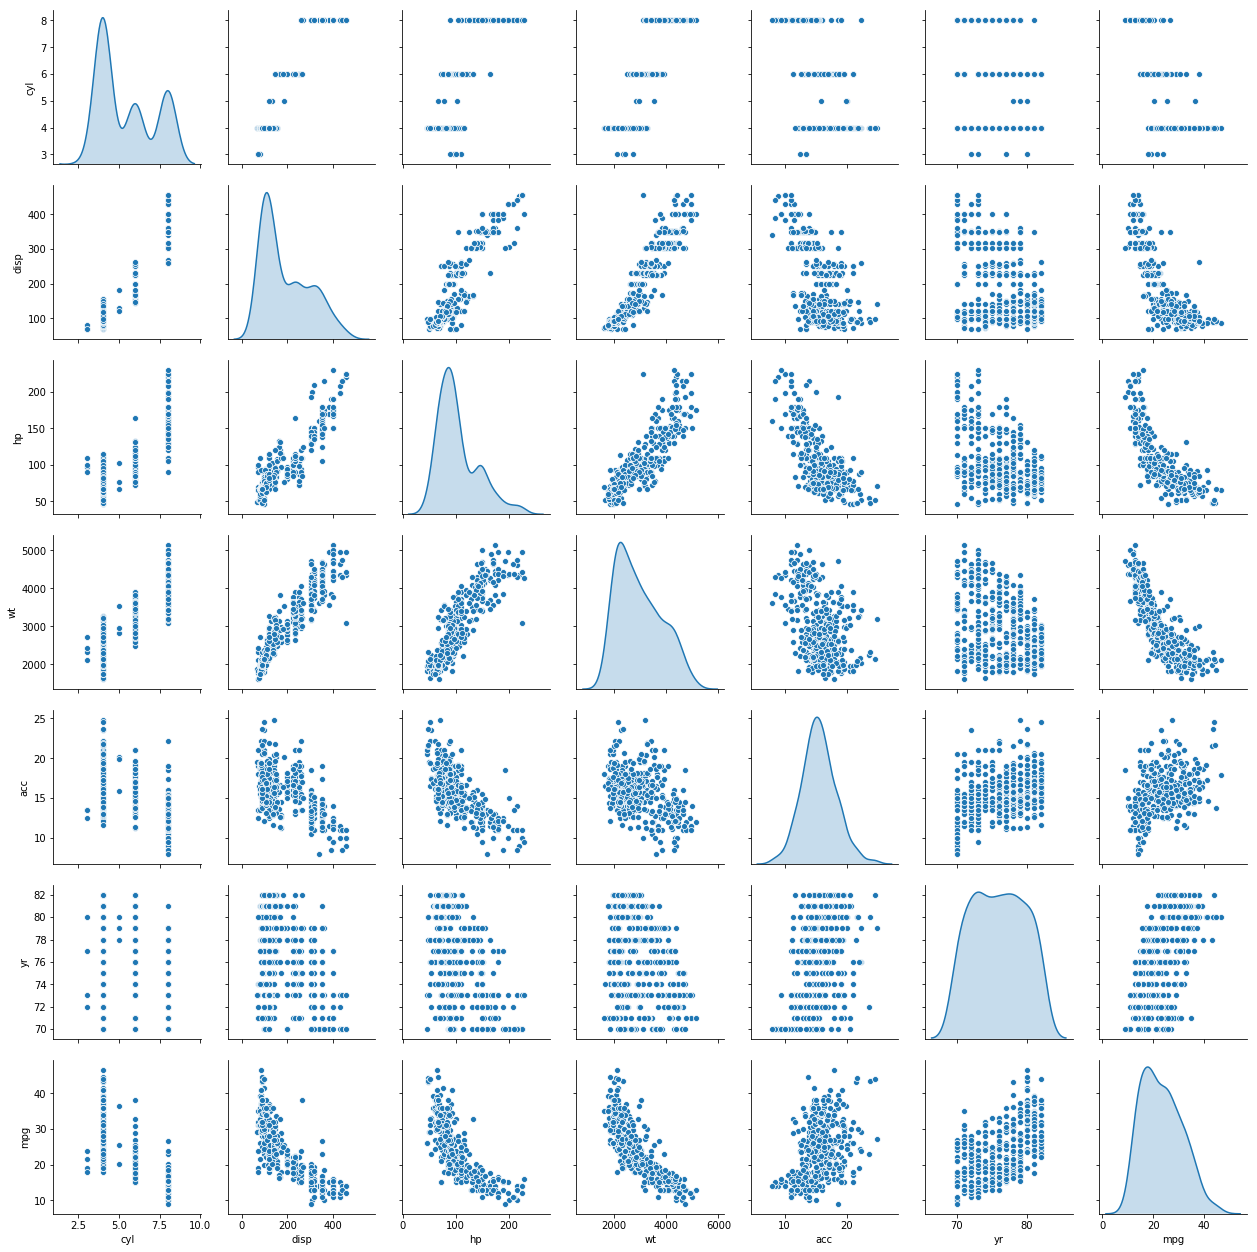

In [18]:
sns.pairplot(cars1,diag_kind='kde')

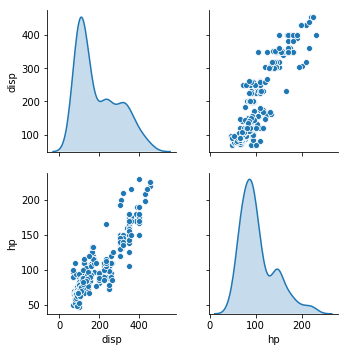

In [19]:
sns.pairplot(cars1,vars=["disp","hp"],diag_kind ='kde')

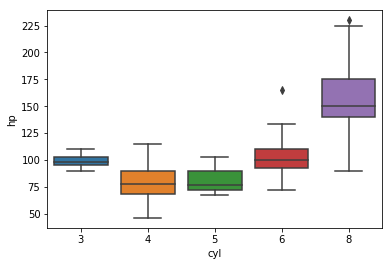

In [20]:
sns.boxplot(y='hp',x='cyl', data = cars1) 

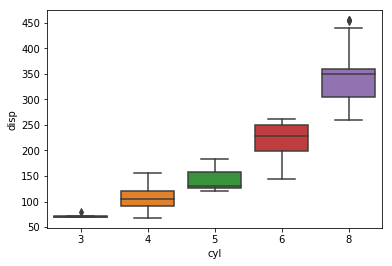

In [21]:
sns.boxplot(y='disp',x='cyl', data = cars1) 

### From the density curve , we get an indication of  three  clusters or more in the dataset

###### Pair plot and heat map also provide insight on relationship between variable. 
###### dsp vs hp, wt vs hp, dsp vs wt , acc vs hp are highly correlated  to each other . 

##### cylinder number also show variance with the displacement  and wt 

cyl        AxesSubplot(0.125,0.657941;0.227941x0.222059)
disp    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
hp      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
wt         AxesSubplot(0.125,0.391471;0.227941x0.222059)
acc     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
yr      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
mpg           AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

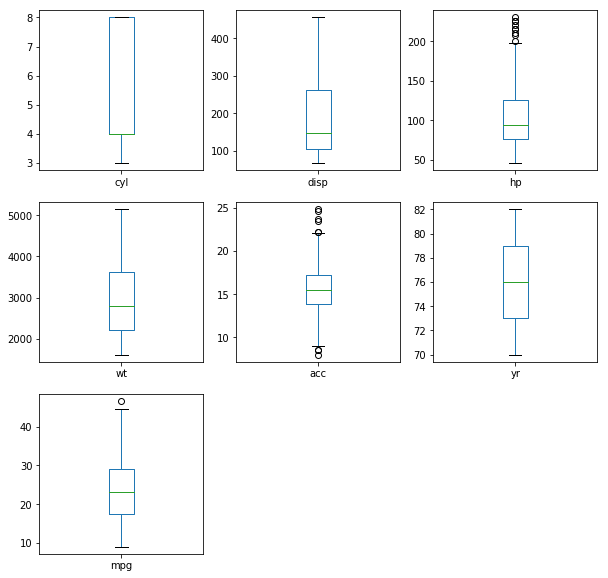

In [22]:
cars1.plot(kind="box",subplots=True, figsize = (10,10), layout=(3,3))

###### Outlier in few of the variables needs to be treated for later building of linear regression model 

In [23]:
cars1 = cars1.iloc[:,1:]  # car_name is not needed 
cars1.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


###### K-means is distance based algo , so need to standardise the data as it has high magnitude variation. Z-score is used to standardise

In [24]:
from scipy.stats import zscore
cars1_z = cars1.apply(zscore)
cars1_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [25]:
cars1_z.iloc[:,:-1].describe()

,cyl,disp,hp,wt,acc,yr
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,1.458911e-16,-9.902743e-17,8.982206e-17,-8.837152e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.527300e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-8.563206e-01,-8.563178e-01,-7.414364e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-8.563206e-01,-4.314040e-01,-2.830161e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,1.498191e+00,6.584879e-01,5.421404e-01,7.538337e-01,5.834349e-01,8.096310e-01
max,1.498191e+00,2.511784e+00,3.292662e+00,2.565185e+00,3.351912e+00,1.621983e+00


In [26]:
array = cars1_z.values
array.shape

(398, 7)

####    KMeans Clustering

In [27]:
from sklearn.cluster import KMeans
cluster_range = range(2,10)  # from pair plot  expected to have atleast 3 clusters or more
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(cars1)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428941e+07
1,3,3.420799e+07
2,4,1.905671e+07
3,5,1.375957e+07
4,6,1.029191e+07
5,7,7.662720e+06
6,8,5.663733e+06
7,9,4.790467e+06


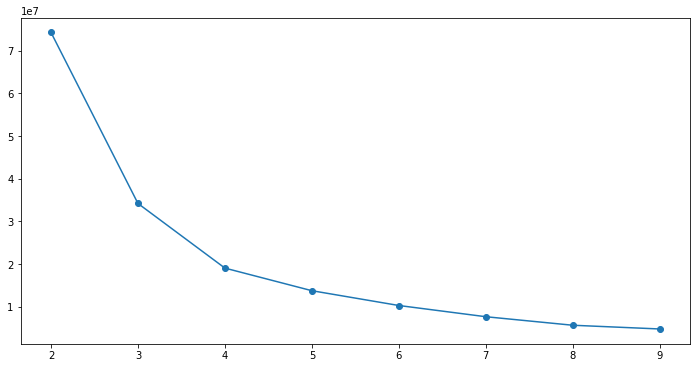

In [28]:
# Elbow plot to find  number of cluster
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

##### Elbow plot suggest there could be 3 to 5 compact clusters in this dataset. We start with 3

In [29]:
cluster = KMeans( n_clusters = 3, random_state = 7)     # start with 3 clusters
cluster.fit(cars1_z)
cars1_z_copy = cars1_z.copy(deep = True)

In [30]:
centroids = cluster.cluster_centers_
centroids

array([[-0.83144897, -0.82490659, -0.77501083, -0.83922555,  0.42094435,
         0.80772404,  1.08070196],
       [-0.19600075, -0.19057026, -0.2390212 , -0.11260498,  0.27947274,
        -0.34293742, -0.26111315],
       [ 1.4864187 ,  1.46865697,  1.47338845,  1.36736404, -1.03371846,
        -0.61198576, -1.12726026]])

In [31]:
centroids_df = pd.DataFrame(centroids, columns = list(cars1_z) )
centroids_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.831449,-0.824907,-0.775011,-0.839226,0.420944,0.807724,1.080702
1,-0.196001,-0.190570,-0.239021,-0.112605,0.279473,-0.342937,-0.261113
2,1.486419,1.468657,1.473388,1.367364,-1.033718,-0.611986,-1.127260


In [32]:
prediction=cluster.predict(cars1_z)
cars1_z["GROUP"] = prediction
cars1_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


In [33]:
cars1_z.groupby(['GROUP']).count()    # almost evenly distributed data in 3 clusters 

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,142,142,142,142,142,142,142
1,156,156,156,156,156,156,156
2,100,100,100,100,100,100,100


In [35]:
cars1_z.values
cars1_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


###### Building Linear regression model 

In [133]:
cars1_z['GROUP'].value_counts()

1    156
0    142
2    100
Name: GROUP, dtype: int64

separate 3  clusters  for linear regression

In [134]:
cars1_cluster1 = cars1_z.loc[cars1_z.GROUP ==0]
cars1_cluster2 = cars1_z.loc[cars1_z.GROUP ==1]
cars1_cluster3 = cars1_z.loc[cars1_z.GROUP ==2]
print(cars1_cluster1.shape,cars1_cluster2.shape,cars1_cluster3.shape)

(142, 8) (156, 8) (100, 8)


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
lr = LinearRegression()

In [205]:
X1= cars1_cluster1.drop(["mpg","GROUP"],axis= 1)
y1= cars1_cluster1["mpg"]

X2= cars1_cluster2.drop(["mpg","GROUP"],axis= 1)
y2= cars1_cluster2["mpg"]

X3= cars1_cluster3.drop(["mpg","GROUP"],axis= 1)
y3= cars1_cluster3["mpg"]

In [227]:
test_size = 0.30    # split test and test size data 70:30
seed = 1         # random number for repeatabilty    
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=test_size, random_state=seed)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=test_size, random_state=seed)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=test_size, random_state=seed)

In [253]:
lr.fit(X1_train,y1_train)          # fit first cluster and find the coefficent
predict1 = lr.predict( X1_test)
for idx, col_name in enumerate(X1_test.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))
print("MAE:",metrics.mean_absolute_error(y1_test, predict1))
print("MSE:",metrics.mean_squared_error(y1_test, predict1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predict1)))
print("r2Score:",metrics.r2_score(y1_test,predict1))

The coefficient for cyl is 1.003785068202647
The coefficient for disp is -0.5014622827937544
The coefficient for hp is -0.4532865643532585
The coefficient for wt is -0.6832034156797502
The coefficient for acc is -0.007732751738804049
The coefficient for yr is 0.48077963433716486
MAE: 0.3525016039412145
MSE: 0.204607543809448
RMSE: 0.4523356539224473
r2Score: 0.5080154648723745


In [254]:
lr.fit(X2_train,y2_train)               #fit second cluster
predict2 = lr.predict( X2_test)
for idx, col_name in enumerate(X2_test.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))
print("MAE:",metrics.mean_absolute_error(y2_test, predict2))
print("MSE:",metrics.mean_squared_error(y2_test, predict2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y2_test, predict2)))
print("r2Score:",metrics.r2_score(y2_test,predict2))

The coefficient for cyl is 0.045029451039185125
The coefficient for disp is -0.1267314249198947
The coefficient for hp is -0.17614147637967847
The coefficient for wt is -0.4718753175885904
The coefficient for acc is -0.07483752993283634
The coefficient for yr is 0.13786710687381423
MAE: 0.23965977926065238
MSE: 0.0983404231714999
RMSE: 0.31359276645276735
r2Score: 0.5028977067174829


In [255]:
lr.fit(X3_train,y3_train)                    #fit third cluster
predict3 = lr.predict( X3_test)
for idx, col_name in enumerate(X3_test.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))
print("MAE:",metrics.mean_absolute_error(y3_test, predict3))
print("MSE:",metrics.mean_squared_error(y3_test, predict3))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y3_test, predict3)))
print("r2Score:",metrics.r2_score(y3_test,predict3))

The coefficient for cyl is -0.1344919937103392
The coefficient for disp is 0.1334419047039808
The coefficient for hp is -0.1318369513323764
The coefficient for wt is -0.2294960495838136
The coefficient for acc is -0.057915532192015014
The coefficient for yr is 0.18417346793659783
MAE: 0.12453733144029125
MSE: 0.025292433180322475
RMSE: 0.15903594933323245
r2Score: 0.6895616908671176


So,we can utilize unspervised method of K-means clustering  and can apply on the dataset to perform prediction for differnt models